<a href="https://colab.research.google.com/github/OPCoderman/MediaPipe_Hand_Sign_landmark_detection/blob/main/Hand_Gesture_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Data Preprocessing:

In [ ]:
df= pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [ ]:
df_copy.isna()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Drop Z
columns_to_drop = df_copy.columns[2::3]
df_copy = df_copy.drop(columns=columns_to_drop)

In [ ]:
df_shuffled = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)
X = df_shuffled.drop(df_shuffled.columns[-1], axis=1)
y = df_shuffled[df_shuffled.columns[-1]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify= y)

In [ ]:
#Wrist Scaling
def wrist_relative_scaling(landmarks):
    landmarks = np.array(landmarks).copy()

    if landmarks.ndim == 2:
        landmarks = landmarks.reshape(-1, 21, 2)
    elif landmarks.ndim == 3:
        pass
    else:
        raise ValueError("Input must be 2D (N,42) or 3D (N,21,2)")

    wrist = landmarks[:, 0, :]
    middle_tip = landmarks[:, 12, :]

    # Compute scale
    scale = np.linalg.norm(middle_tip - wrist, axis=1, keepdims=True)
    scale[scale == 0] = 1  # Avoid division by zero

    # Normalize landmarks: (landmarks - wrist) / scale
    landmarks = (landmarks - wrist[:, np.newaxis, :]) / scale[:, np.newaxis, :]

    # Flatten
    return landmarks.reshape(landmarks.shape[0], -1)

In [ ]:
print("X_train original shape:", X_train.shape)
print("X_test original shape:", X_test.shape)

X_scaled = wrist_relative_scaling(X_train)
X_test_scaled = wrist_relative_scaling(X_test)

print("X_scaled shape:", X_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train original shape: (20540, 42)
X_test original shape: (5135, 42)
X_scaled shape: (20540, 42)
X_test_scaled shape: (5135, 42)


In [ ]:
#encode labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("y_encoded shape:", y_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

y_encoded shape: (20540,)
y_test_encoded shape: (5135,)


##Random Forest Classifier:

In [ ]:
#train the model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,random_state=42)
RFC.fit(X_scaled,y_encoded)
RFC_pred = RFC.predict(X_test_scaled)

In [ ]:
#evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

RFC_pred = RFC.predict(X_test_scaled)

RFC_accuracy = accuracy_score(y_test_encoded, RFC_pred)
RFC_precision = precision_score(y_test_encoded, RFC_pred, average='weighted')
RFC_recall = recall_score(y_test_encoded, RFC_pred, average='weighted')
RFC_f1 = f1_score(y_test_encoded, RFC_pred, average='weighted')

print(
    f"""RFC Metrics: "
    "Accuracy = {RFC_accuracy},
    "Precision = {RFC_precision},
    "Recall = {RFC_recall},
    "F1 = {RFC_f1}"""
)

RFC Metrics: "
    "Accuracy = 0.972541382667965, 
    "Precision = 0.9729212939400341, 
    "Recall = 0.972541382667965, 
    "F1 = 0.9726107486998542


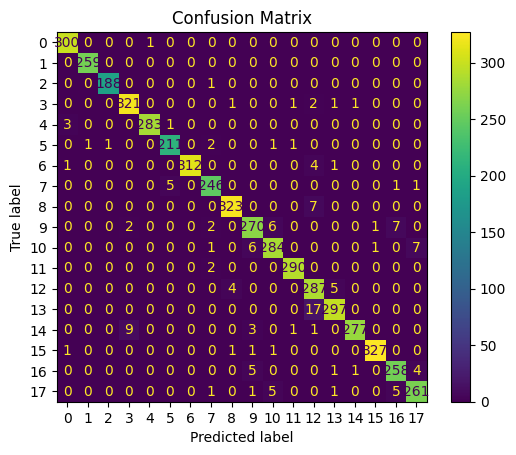

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, RFC_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from joblib import dump, load
dump(RFC, 'random_forest_model.joblib')

['random_forest_model.joblib']

##SVM Model:

In [ ]:
from sklearn import svm
SVM = svm.SVC(kernel='linear')
SVM.fit(X_scaled, y_encoded)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

SVM_pred = SVM.predict(X_test_scaled)

SVM_accuracy = accuracy_score(y_test_encoded, SVM_pred)
SVM_precision = precision_score(y_test_encoded, SVM_pred, average='weighted')
SVM_recall = recall_score(y_test_encoded, SVM_pred, average='weighted')
SVM_f1 = f1_score(y_test_encoded, SVM_pred, average='weighted')

print(
    f"""SVM Metrics: "
    "Accuracy = {SVM_accuracy},
    "Precision = {SVM_precision},
    "Recall = {SVM_recall},
    "F1 = {SVM_f1}"""
)

SVM Metrics: "
    "Accuracy = 0.8588120740019474, 
    "Precision = 0.8604563539932484, 
    "Recall = 0.8588120740019474, 
    "F1 = 0.8576259179981892


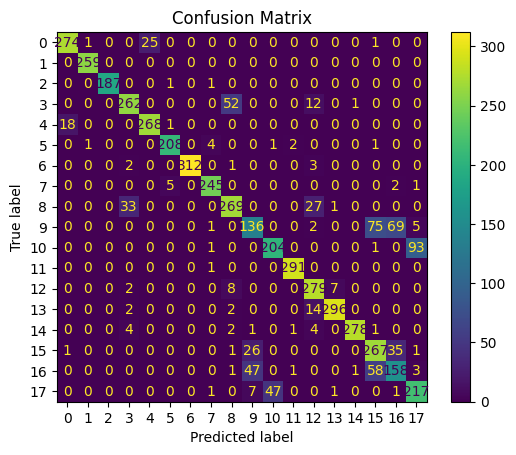

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, SVM_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from joblib import dump, load
dump(SVM, 'SVM_model.joblib')

['SVM_model.joblib']

##XGBoost Model:

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define  XGBoost model with tuned hyperparameters
XGB = xgb.XGBClassifier(
    max_depth=7,
    learning_rate=0.04980282722383345,
    n_estimators=730,
    min_child_weight=5,
    gamma=0.15019269405797428,
    subsample=0.9314905002229553,
    colsample_bytree=0.9082541117160634,
    reg_alpha=0.8225655601606828,
    reg_lambda=8.146896526387623,
    objective='multi:softmax',
    num_class=len(set(y_encoded)),
)

# Train the model
XGB.fit(X_scaled, y_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9082541117160634, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.15019269405797428,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04980282722383345,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=730, n_jobs=None, num_class=18,
              num_parallel_tree=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

XGB_pred = XGB.predict(X_test_scaled)

accuracy = accuracy_score(y_test_encoded, XGB_pred)
precision = precision_score(y_test_encoded, XGB_pred, average='weighted')
recall = recall_score(y_test_encoded, XGB_pred, average='weighted')
f1 = f1_score(y_test_encoded, XGB_pred, average='weighted')

print(
    f"""XGBoost Metrics: "
    "Accuracy = {accuracy},
    "Precision = {precision},
    "Recall = {recall},
    "F1 = {f1}"""
)

XGBoost Metrics: "
    "Accuracy = 0.972541382667965, 
    "Precision = 0.9729212939400341, 
    "Recall = 0.972541382667965, 
    "F1 = 0.9726107486998542


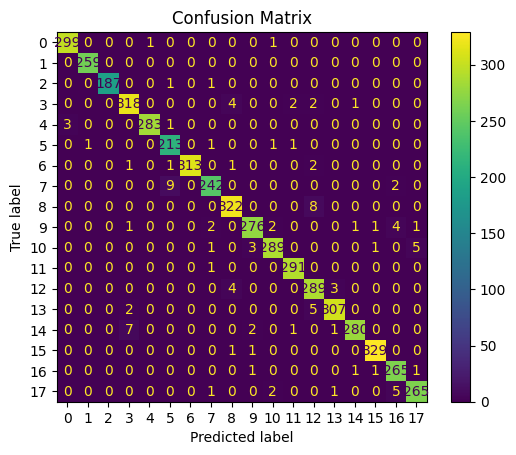

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test_encoded, XGB_pred)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
XGB.save_model("xgboost_model.model")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:40:58] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


##Hand Recognition using MediaPipe:

In [ ]:
import numpy as np
import cv2
import xgboost as xgb
from collections import deque
import mediapipe as mp
from google.colab.patches import cv2_imshow
from IPython.display import display, HTML, clear_output
import base64
import time
import ipywidgets as widgets

# Initialize MediaPipe
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Load XGBoost model
model = xgb.Booster()
model.load_model("xgboost_model.model")

# Hand sign classes
HAND_SIGN_CLASSES = [
    "call", "dislike", "fist", "four", "like", "mute", "ok", "one", "palm",
    "peace", "peace inv.", "rock", "stop", "stop inv.", "three", "three 2",
    "two up", "two up inv."
]

# Initialize Mediapipe Hands with faster settings
hands = mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Stabilization window
prediction_window = deque(maxlen=3)

# Setup hidden camera
display(HTML('''
<div>
    <video id="webcam" autoplay playsinline style="display:none;"></video>
    <button id="startBtn" style="margin-top:10px;">Start Processing</button>
</div>
<script>
    const video = document.getElementById('webcam');
    let stream = null;
    let processing = false;

    async function startCamera() {
        try {
            stream = await navigator.mediaDevices.getUserMedia({
                video: {
                    width: { ideal: 640 },
                    height: { ideal: 480 },
                    frameRate: { ideal: 15 }
                },
                audio: false
            });
            video.srcObject = stream;
            return true;
        } catch (err) {
            console.error('Camera error:', err);
            return false;
        }
    }

    function captureFrame() {
        return new Promise((resolve) => {
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            const ctx = canvas.getContext('2d');
            ctx.drawImage(video, 0, 0);
            resolve(canvas.toDataURL('image/jpeg', 0.7));
        });
    }

    document.getElementById('startBtn').addEventListener('click', async () => {
        if (!processing) {
            processing = true;
            document.getElementById('startBtn').disabled = true;
            await startCamera();
            processFrames();
        }
    });

    async function processFrames() {
        while (processing) {
            try {
                const frame = await captureFrame();
                google.colab.kernel.invokeFunction(
                    'notebook.processFrame',
                    [frame],
                    {}
                );
                // Process only 5 frames per second
                await new Promise(r => setTimeout(r, 200));
            } catch (err) {
                console.error('Processing error:', err);
            }
        }
    }

    function stopProcessing() {
        processing = false;
        if (stream) {
            stream.getTracks().forEach(track => track.stop());
        }
    }

    window.stopProcessing = stopProcessing;
</script>
'''))

# Create output widget for processed frames
output_widget = widgets.Output()
display(output_widget)

# Create stop button
stop_button = widgets.Button(description="Stop Processing")
display(stop_button)

def stop_processing(b):
    display(HTML('<script>window.stopProcessing();</script>'))
    stop_button.disabled = True

stop_button.on_click(stop_processing)

# Frame processing function
def processFrame(frame_data):
    try:
        # Decode frame
        img_bytes = base64.b64decode(frame_data.split(',')[1])
        img = cv2.imdecode(np.frombuffer(img_bytes, dtype=np.uint8), cv2.IMREAD_COLOR)

        if img is None:
            return

        # Process frame
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = hands.process(img_rgb)

        hand_sign = "No hand detected"

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw landmarks
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()
                )

                # Process landmarks
                landmarks = np.array([[lm.x, lm.y] for lm in hand_landmarks.landmark])
                wrist = landmarks[0]
                middle_tip = landmarks[12]
                scale = np.linalg.norm(middle_tip - wrist) or 1
                landmarks = (landmarks - wrist) / scale

                # Predict
                dmatrix = xgb.DMatrix(landmarks.flatten().reshape(1, -1))
                prediction = model.predict(dmatrix)
                predicted_class = int(prediction[0])
                prediction_window.append(predicted_class)

                stabilized_class = max(set(prediction_window), key=prediction_window.count)
                hand_sign = HAND_SIGN_CLASSES[stabilized_class]

        # Add overlay
        img_output = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
        cv2.putText(
            img_output,
            f"Hand Sign: {hand_sign}",
            (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.8,
            (0, 255, 0),
            2,
            cv2.LINE_AA
        )

        # Display processed frame
        with output_widget:
            clear_output(wait=True)
            cv2_imshow(img_output)

    except Exception as e:
        print(f"Processing error: {e}")

# Register callback
output.register_callback('notebook.processFrame', processFrame)

Output()

Button(description='Stop Processing', style=ButtonStyle())

Processing error: OpenCV(4.11.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:993: error: (-215:Assertion failed) !buf.empty() in function 'imdecode_'

